In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/.DS_Store
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data.tar.gz
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/.vscode/settings.json
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/AppUninstalled.csv
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/Registration.csv
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/AppLaunched.csv
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/VideoStarted.csv
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/VideoDetails.csv
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/UTMVisited.csv
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Notebooks/Capstone.ipynb
/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Notebook

In [3]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
path_app_launched = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/AppLaunched.csv'

In [5]:
df_app_launched = pd.read_csv(path_app_launched, parse_dates=['Date']).drop_duplicates()

In [6]:
def convert_to_datetime(temp) :
    temp['Timestamp'] = (temp['Minute_Of_Day']*60 + temp['Second'])/60
    temp['Timestamp'] = pd.to_datetime(temp['Timestamp'], unit='m').dt.round('1s').dt.time
    temp['Timestamp'] = pd.to_datetime(temp['Date'].astype(str)+' '
                                                                 + temp['Timestamp'].astype(str))
    temp.drop(columns = ['Date', 'Minute_Of_Day', 'Second'], inplace=True)
    return temp['Timestamp']

In [7]:
df_app_launched.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,a27134c322d4f56dabc106a6847cb96b,2017-01-06,0,4,50,1,1,2
1,aab39ad0874c59cc388525d511667f9d,2017-01-06,0,8,40,1,1,2
2,f717dc3f757dc18cc0c3f27ed3e94ef8,2017-01-06,0,12,35,1,1,2
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-06,0,20,40,1,2,2
4,71f05822bb699a04b694dd30265fdf73,2017-01-06,0,20,35,1,1,2


In [8]:
# df_app_launched['Minute_Of_Day'].apply(lambda x : int(x/60)).head()

# df_app_launched['Minute_Of_Day'].apply(lambda x : int(x%60)).head()

df_app_launched['Timestamp'] = (df_app_launched['Minute_Of_Day']*60 + df_app_launched['Second'])/60

df_app_launched['Time_App_Launch'] = pd.to_datetime(df_app_launched['Timestamp'], unit='m').dt.round('1s').dt.time

In [9]:
df_app_launched.rename(columns={'Date' : 'Date_App_Launch'}, inplace=True)

df_app_launched.drop(columns=['Minute_Of_Day', 'Second', 'Timestamp'], inplace=True)


df_app_launched['Timestamp_App_Launch'] = pd.to_datetime(df_app_launched['Date_App_Launch'].astype(str)+' '+ df_app_launched['Time_App_Launch'].astype(str))

df_app_launched.drop(columns=['Date_App_Launch', 'Time_App_Launch'], inplace=True)

In [10]:
df_app_launched = df_app_launched[['Timestamp_App_Launch','UserId', 'State', 'Country', 'Device', 'OS']]

In [11]:
df_app_launched.head()

,Timestamp_App_Launch,UserId,State,Country,Device,OS
0,2017-01-06 00:00:04,a27134c322d4f56dabc106a6847cb96b,50,1,1,2
1,2017-01-06 00:00:08,aab39ad0874c59cc388525d511667f9d,40,1,1,2
2,2017-01-06 00:00:12,f717dc3f757dc18cc0c3f27ed3e94ef8,35,1,1,2
3,2017-01-06 00:00:20,04c1e14fd54a06c0d4fe98cf0cb8b04c,40,1,2,2
4,2017-01-06 00:00:20,71f05822bb699a04b694dd30265fdf73,35,1,1,2


In [12]:
country_distribution = df_app_launched['Country'].value_counts()*100/df_app_launched['Country'].value_counts().sum()

In [13]:
country_distribution.sort_values(ascending=False).head()

1      72.806787
40     22.843301
255     3.478333
14      0.286715
46      0.125475
Name: Country, dtype: float64

<Figure size 720x648 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text xticklabel objects>)

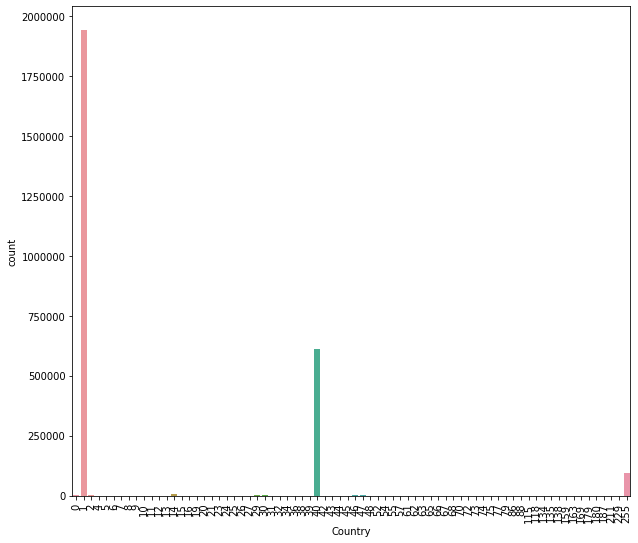

In [14]:
plt.figure(figsize=(10, 9))
sns.countplot(x='Country', data=df_app_launched)
plt.xticks(rotation = 90)
plt.show()

> around 72.5% data from country 1 & 23% data from country 40

In [15]:
df_app_launched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667456 entries, 0 to 2716092
Data columns (total 6 columns):
Timestamp_App_Launch    datetime64[ns]
UserId                  object
State                   int64
Country                 int64
Device                  int64
OS                      int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 142.5+ MB


In [16]:
path_user_registration = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/Registration.csv'

In [17]:
df_app_registration = pd.read_csv(path_user_registration).drop_duplicates()

In [18]:
df_app_registration.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed


In [19]:
# df_app_launched['Minute_Of_Day'].apply(lambda x : int(x/60)).head()

# df_app_launched['Minute_Of_Day'].apply(lambda x : int(x%60)).head()

df_app_registration['Timestamp'] = (df_app_registration['Minute_Of_Day']*60 + df_app_registration['Second'])/60

df_app_registration['Time_App_Registered'] = pd.to_datetime(df_app_registration['Timestamp'], 
                                                        unit='m').dt.round('1s').dt.time

In [20]:
df_app_registration.head()
df_app_registration['Timestamp_App_Registered'] = pd.to_datetime(df_app_registration['Date'].astype(str)+' '
                                                                 + df_app_registration['Time_App_Registered'].astype(str))


,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status,Timestamp,Time_App_Registered
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete,0.133333,00:00:08
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed,0.133333,00:00:08
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete,0.466667,00:00:28
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed,0.866667,00:00:52
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed,0.866667,00:00:52


In [21]:
df_app_registration.drop(columns=['Date', 'Minute_Of_Day', 'Second', 'Time_App_Registered', 'Timestamp'], inplace=True)

In [22]:
df_app_registration.columns

Index(['UserId', 'State', 'Country', 'Device', 'OS', 'Status',
       'Timestamp_App_Registered'],
      dtype='object')

In [23]:
df_app_registration = df_app_registration[['Timestamp_App_Registered', 'UserId', 
                                           'State', 'Country', 'Device', 'OS', 'Status']]

In [24]:
country_distribution = df_app_registration['Country'].value_counts()*100/df_app_registration['Country'].value_counts().sum()

In [25]:
country_distribution.sort_index(ascending=True, inplace=True)

<Figure size 576x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

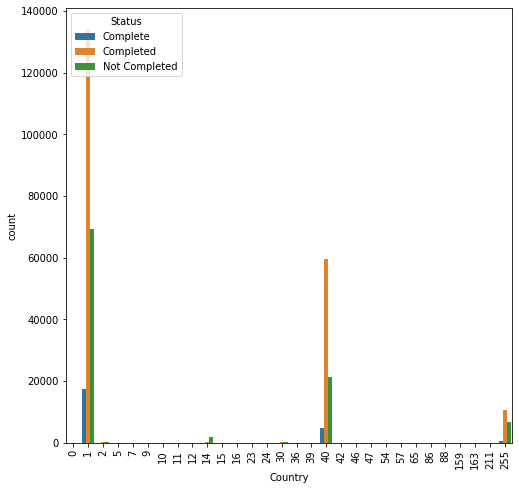

In [26]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Country', hue='Status', data=df_app_registration)
plt.xticks(rotation = 90)

In [27]:
len(df_app_registration['UserId'].unique())

259318

In [28]:
len(df_app_launched['UserId'].unique())

449387

In [29]:
df_app_launched.shape, df_app_registration.shape

((2667456, 6), (327274, 7))

In [30]:
df_app_registration['Status'].unique()

array(['Complete', 'Completed', 'Not Completed'], dtype=object)

<Figure size 720x576 with 0 Axes>

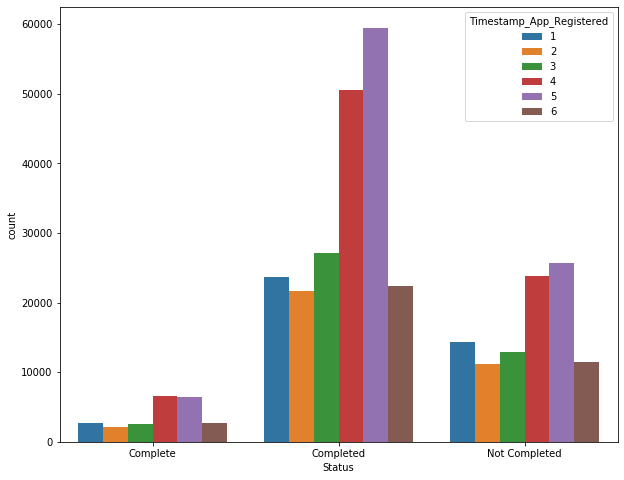

In [31]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df_app_registration['Status'], hue=df_app_registration['Timestamp_App_Registered'].dt.month)

In [32]:
df_app_launched.isna().sum()
df_app_registration.isna().sum()

Timestamp_App_Launch    0
UserId                  0
State                   0
Country                 0
Device                  0
OS                      0
dtype: int64

Timestamp_App_Registered    0
UserId                      0
State                       0
Country                     0
Device                      0
OS                          0
Status                      0
dtype: int64

In [33]:
path_app_uninstalled = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/AppUninstalled.csv'
path_video_started = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/VideoStarted.csv'
path_video_details = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/VideoDetails.csv'
path_utm_visited = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/GreyAtomCapstone/Data/UTMVisited.csv'

In [34]:
df_app_uninstalled = pd.read_csv(path_app_uninstalled).drop_duplicates()

In [35]:
df_video_started = pd.read_csv(path_video_started).drop_duplicates()

In [36]:
df_video_details = pd.read_csv(path_video_details).drop_duplicates()

In [37]:
df_utm_visited = pd.read_csv(path_utm_visited).drop_duplicates()

In [38]:
df_utm_visited.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1
1,1a40d7e5b34131b097fac80cf982241b,20170106,0,56,40,1,1,1
2,b7b3c1ce773a13b52d39429e305ea615,20170106,1,16,35,1,1,1
3,3f486a89433a02b96ab13b16c82e39fd,20170106,1,32,35,1,1,1
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,1,32,38,1,1,1


In [39]:
df_app_uninstalled.isna().sum()
df_video_details.isna().sum()
df_video_started.isna().sum()
df_utm_visited.isna().sum()

UserId           0
Date             0
Minute_Of_Day    0
Second           0
State            0
Country          0
Device           0
OS               0
dtype: int64

UserId           0
Date             0
Minute_Of_Day    0
Second           0
State            0
Genre            0
Category         0
ProgramType      0
Country          0
Device           0
OS               0
VideoId          0
dtype: int64

UserId           0
Date             0
Minute_Of_Day    0
Second           0
State            0
Genre            0
Category         0
ProgramType      0
Country          0
Device           0
OS               0
VideoId          0
dtype: int64

UserId           0
Date             0
Minute_Of_Day    0
Second           0
State            0
Country          0
Device           0
OS               0
dtype: int64

In [40]:
def convert_to_datetime(temp) :
    temp['Timestamp'] = (temp['Minute_Of_Day']*60 + temp['Second'])/60
    temp['Timestamp'] = pd.to_datetime(temp['Timestamp'], unit='m').dt.round('1s').dt.time
    temp['Timestamp'] = pd.to_datetime(temp['Date'].astype(str)+' '
                                                                 + temp['Timestamp'].astype(str))
    temp.drop(columns = ['Date', 'Minute_Of_Day', 'Second'], inplace=True)
    return temp['Timestamp']

In [41]:
df_app_uninstalled['Timestamp_app_uninstalled'] = convert_to_datetime(df_app_uninstalled)

df_app_uninstalled.drop(columns='Timestamp', inplace=True)

df_app_uninstalled.head()

,UserId,State,Country,Device,OS,Timestamp_app_uninstalled
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,47,1,1,1,2017-01-06 00:00:00
1,807018f66aba113be576eb8afa4ea4b6,6,1,1,1,2017-01-06 00:00:00
2,763e66e04918d8b8a7e69a778f5a742a,41,1,1,1,2017-01-06 00:01:00
3,4ee1ed456fa04fc42168a9787b54b549,37,1,1,1,2017-01-06 00:01:00
4,253e758a5557f9de890e814d901f6906,46,40,1,1,2017-01-06 00:06:00


In [42]:
df_video_details.head()
df_video_details['Timestamp_video_details'] = convert_to_datetime(df_video_details)

df_video_details.drop(columns='Timestamp', inplace=True)

df_video_details.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_details
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,2017-01-06 00:00:20


In [43]:
df_video_started.head()

df_video_started['Timestamp_video_started'] = convert_to_datetime(df_video_started)

df_video_started.drop(columns='Timestamp', inplace=True)

df_video_started.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,0280dfdd112732a3ac12b12dc770b7af,20170106,0,8,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94
1,435d41ae019cb8db785483793859c9a8,20170106,0,28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c
2,1faf0ce0b98e02e1568702f516f01a78,20170106,0,36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53
3,3ec691b9d2b5d53ef965fe59b1900b30,20170106,0,48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546
4,ff230d487a7139b65f33b54a4cbd2d9e,20170106,0,56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_started
0,0280dfdd112732a3ac12b12dc770b7af,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94,2017-01-06 00:00:08
1,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c,2017-01-06 00:00:28
2,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53,2017-01-06 00:00:36
3,3ec691b9d2b5d53ef965fe59b1900b30,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546,2017-01-06 00:00:48
4,ff230d487a7139b65f33b54a4cbd2d9e,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39,2017-01-06 00:00:56


In [44]:
df_utm_visited.head()

df_utm_visited['Timestamp_utm_visited'] = convert_to_datetime(df_utm_visited)

df_utm_visited.drop(columns='Timestamp', inplace=True)

df_utm_visited.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1
1,1a40d7e5b34131b097fac80cf982241b,20170106,0,56,40,1,1,1
2,b7b3c1ce773a13b52d39429e305ea615,20170106,1,16,35,1,1,1
3,3f486a89433a02b96ab13b16c82e39fd,20170106,1,32,35,1,1,1
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,1,32,38,1,1,1


,UserId,State,Country,Device,OS,Timestamp_utm_visited
0,66d4abf4f3b733c27591b3f47c85eff7,37,1,1,1,2017-01-06 00:00:52
1,1a40d7e5b34131b097fac80cf982241b,40,1,1,1,2017-01-06 00:00:56
2,b7b3c1ce773a13b52d39429e305ea615,35,1,1,1,2017-01-06 00:01:16
3,3f486a89433a02b96ab13b16c82e39fd,35,1,1,1,2017-01-06 00:01:32
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,38,1,1,1,2017-01-06 00:01:32


In [45]:
df_app_launched.head()
df_app_registration.head()
df_app_uninstalled.head()
df_video_details.head()
df_video_started.head()
df_utm_visited.head()

,Timestamp_App_Launch,UserId,State,Country,Device,OS
0,2017-01-06 00:00:04,a27134c322d4f56dabc106a6847cb96b,50,1,1,2
1,2017-01-06 00:00:08,aab39ad0874c59cc388525d511667f9d,40,1,1,2
2,2017-01-06 00:00:12,f717dc3f757dc18cc0c3f27ed3e94ef8,35,1,1,2
3,2017-01-06 00:00:20,04c1e14fd54a06c0d4fe98cf0cb8b04c,40,1,2,2
4,2017-01-06 00:00:20,71f05822bb699a04b694dd30265fdf73,35,1,1,2


,Timestamp_App_Registered,UserId,State,Country,Device,OS,Status
0,2017-01-06 00:00:08,d168e2b924124feaad13eae44a68fce9,35,1,1,2,Complete
1,2017-01-06 00:00:08,deed7490952a6746610ee2ee9fd219b7,7,40,1,1,Completed
2,2017-01-06 00:00:28,13d9f55e297d7d9c219fbe9085e1006c,35,1,1,2,Complete
3,2017-01-06 00:00:52,fccc2c0abf5afabf242a70df7b4c9e69,39,1,1,1,Completed
4,2017-01-06 00:00:52,9ff982b29d78cefc8eb5a3ffb7fd2a5d,38,1,1,1,Not Completed


,UserId,State,Country,Device,OS,Timestamp_app_uninstalled
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,47,1,1,1,2017-01-06 00:00:00
1,807018f66aba113be576eb8afa4ea4b6,6,1,1,1,2017-01-06 00:00:00
2,763e66e04918d8b8a7e69a778f5a742a,41,1,1,1,2017-01-06 00:01:00
3,4ee1ed456fa04fc42168a9787b54b549,37,1,1,1,2017-01-06 00:01:00
4,253e758a5557f9de890e814d901f6906,46,40,1,1,2017-01-06 00:06:00


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_details
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,2017-01-06 00:00:20


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_started
0,0280dfdd112732a3ac12b12dc770b7af,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94,2017-01-06 00:00:08
1,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c,2017-01-06 00:00:28
2,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53,2017-01-06 00:00:36
3,3ec691b9d2b5d53ef965fe59b1900b30,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546,2017-01-06 00:00:48
4,ff230d487a7139b65f33b54a4cbd2d9e,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39,2017-01-06 00:00:56


,UserId,State,Country,Device,OS,Timestamp_utm_visited
0,66d4abf4f3b733c27591b3f47c85eff7,37,1,1,1,2017-01-06 00:00:52
1,1a40d7e5b34131b097fac80cf982241b,40,1,1,1,2017-01-06 00:00:56
2,b7b3c1ce773a13b52d39429e305ea615,35,1,1,1,2017-01-06 00:01:16
3,3f486a89433a02b96ab13b16c82e39fd,35,1,1,1,2017-01-06 00:01:32
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,38,1,1,1,2017-01-06 00:01:32


In [46]:
df_app_launched['UserId'].nunique()

df_app_registration['UserId'].nunique()

df_utm_visited['UserId'].nunique()

df_app_uninstalled['UserId'].nunique()

df_video_details['UserId'].nunique()

df_video_started['UserId'].nunique()

449387

259318

281612

307803

252030

165093

In [47]:
len(set(df_utm_visited['UserId']).intersection(set(df_app_launched['UserId'])))

281416

In [48]:
df_app_launched.shape, df_app_launched['UserId'].nunique()

((2667456, 6), 449387)

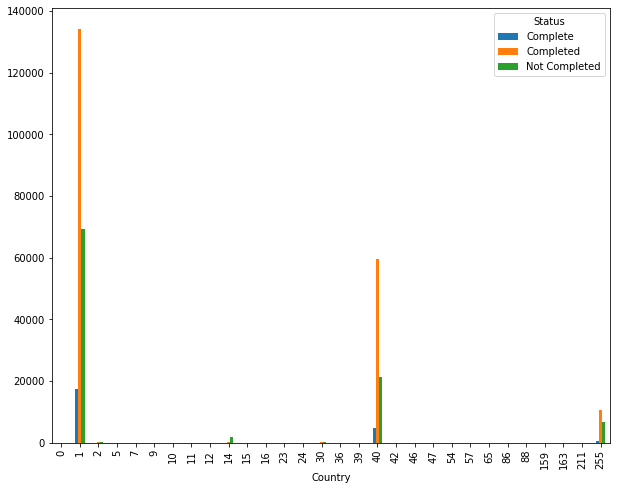

In [49]:
df_app_registration.groupby(['Country', 'Status']).size().unstack().plot(kind='bar', figsize=(10,8))

>Hypothesis 1 : Max app uninstall might be due to buggy application

In [50]:
df_app_uninstalled.nunique()

UserId                       307803
State                           111
Country                          55
Device                            4
OS                                3
Timestamp_app_uninstalled     24356
dtype: int64

In [51]:
df_app_uninstalled.groupby(['Device']).size()*100/sum(df_app_uninstalled.groupby(['Device']).size())

Device
0     0.519111
1    94.532108
2     4.903266
3     0.045515
dtype: float64

In [52]:
df_app_uninstalled.groupby(['Device','OS']).size()*100/sum(df_app_uninstalled.groupby(['Device','OS']).size())

Device  OS
0       0      0.406863
        1      0.110096
        2      0.002153
1       1     90.721805
        2      3.810303
2       1      4.245459
        2      0.657808
3       1      0.045515
dtype: float64

In [53]:
df_video_details.columns
df_video_started.columns

Index(['UserId', 'State', 'Genre', 'Category', 'ProgramType', 'Country',
       'Device', 'OS', 'VideoId', 'Timestamp_video_details'],
      dtype='object')

Index(['UserId', 'State', 'Genre', 'Category', 'ProgramType', 'Country',
       'Device', 'OS', 'VideoId', 'Timestamp_video_started'],
      dtype='object')

> No data to support that viewing details leads to watching videos

In [54]:
df_video_started.sort_values(by = ['UserId', 'Timestamp_video_started'], inplace=True)

In [55]:
df_video_started.head()
df_video_started.tail()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_started
207115,0000146e97c32d369268e5ba5f4b907c,36,Drama,vod,TV Shows,1,1,1,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16
787101,00004010d92c2f13b824237bc323d58b,33,Anime,vod,TV Shows,40,2,1,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20
787140,00004010d92c2f13b824237bc323d58b,33,Family,vod,TV Shows,40,2,1,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56
1715539,000076c7bbdf7e4568777134cc4bec56,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00
1736368,000076c7bbdf7e4568777134cc4bec56,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48


,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_started
605278,ffff2efb37851e7ae7bdba1f8f6e94ba,31,Drama,vod,TV Shows,40,1,2,5c0f1f6e255af1a4b8f61f778c0529bd,2017-04-21 19:55:28
1016602,ffff83e4d19655a89c433a3fe587cd84,31,Drama,vod,TV Shows,40,1,2,509bef28c5c57ce6e73a45b7776e3827,2017-05-11 06:54:52
1260687,ffffc4597dce678c23b007f9e5769426,31,Drama,vod,TV Shows,40,1,1,c1c28e3151b39245290365040a777475,2017-05-22 16:44:52
1267681,ffffc4597dce678c23b007f9e5769426,31,Anime,vod,TV Shows,40,1,1,00f64ef90b339899b6854a7118d497de,2017-05-22 21:16:04
1268275,ffffc4597dce678c23b007f9e5769426,31,Anime,vod,TV Shows,40,1,1,ed7eb42486c1d2d245805838434a0520,2017-05-22 21:38:20


In [56]:
final_df = df_video_started[['UserId', 'VideoId', 'Timestamp_video_started']].copy()

In [57]:
final_df.head()

,UserId,VideoId,Timestamp_video_started
207115,0000146e97c32d369268e5ba5f4b907c,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16
787101,00004010d92c2f13b824237bc323d58b,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20
787140,00004010d92c2f13b824237bc323d58b,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56
1715539,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00
1736368,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48


In [58]:
final_df[['VideoId_2', 'Timestamp_video_started_2']] = df_video_started.groupby('UserId')[['VideoId','Timestamp_video_started']].shift(-1)

In [59]:
final_df.head()

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2
207115,0000146e97c32d369268e5ba5f4b907c,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,NaN,NaT
787101,00004010d92c2f13b824237bc323d58b,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56
787140,00004010d92c2f13b824237bc323d58b,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,NaN,NaT
1715539,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48
1736368,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16


In [60]:
final_df['Video_watch_interval'] = (final_df['Timestamp_video_started_2'] - final_df['Timestamp_video_started']).astype('timedelta64[h]')

In [61]:
final_df.head()

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2,Video_watch_interval
207115,0000146e97c32d369268e5ba5f4b907c,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,NaN,NaT,NaN
787101,00004010d92c2f13b824237bc323d58b,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,0.0
787140,00004010d92c2f13b824237bc323d58b,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,NaN,NaT,NaN
1715539,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,24.0
1736368,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,0.0


In [62]:
final_df[['UserId', 'Timestamp_video_started', 'Timestamp_video_started_2', 'Video_watch_interval']].head()

,UserId,Timestamp_video_started,Timestamp_video_started_2,Video_watch_interval
207115,0000146e97c32d369268e5ba5f4b907c,2017-02-23 11:48:16,NaT,NaN
787101,00004010d92c2f13b824237bc323d58b,2017-04-30 21:40:20,2017-04-30 21:41:56,0.0
787140,00004010d92c2f13b824237bc323d58b,2017-04-30 21:41:56,NaT,NaN
1715539,000076c7bbdf7e4568777134cc4bec56,2017-06-09 19:59:00,2017-06-10 20:17:48,24.0
1736368,000076c7bbdf7e4568777134cc4bec56,2017-06-10 20:17:48,2017-06-10 20:19:16,0.0


In [63]:
final_df.dtypes

UserId                               object
VideoId                              object
Timestamp_video_started      datetime64[ns]
VideoId_2                            object
Timestamp_video_started_2    datetime64[ns]
Video_watch_interval                float64
dtype: object

In [64]:
final_df.dropna(inplace=True)

In [65]:
final_df.head()

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2,Video_watch_interval
787101,00004010d92c2f13b824237bc323d58b,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,0.0
1715539,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,24.0
1736368,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,0.0
1736418,000076c7bbdf7e4568777134cc4bec56,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,0.0
1737838,000076c7bbdf7e4568777134cc4bec56,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,a4a773531e35757badfe759f6d69e7a7,2017-06-10 23:47:44,2.0


In [66]:
final_df['Target'] = np.nan

In [67]:
#df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>
#final_df.loc[final_df['Video_watch_interval'].isna(), ['Target']] = 0

In [68]:
final_df.loc[final_df['Video_watch_interval'] > 48, ['Target']] = 0

In [69]:
final_df.loc[final_df['Video_watch_interval'] <= 48, ['Target']] = 1

In [70]:
df_utm_visited.sort_values(by=['UserId', 'Timestamp_utm_visited'], inplace=True)

In [71]:
final_df.head()

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2,Video_watch_interval,Target
787101,00004010d92c2f13b824237bc323d58b,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,0.0,1.0
1715539,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,24.0,1.0
1736368,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,0.0,1.0
1736418,000076c7bbdf7e4568777134cc4bec56,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,0.0,1.0
1737838,000076c7bbdf7e4568777134cc4bec56,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,a4a773531e35757badfe759f6d69e7a7,2017-06-10 23:47:44,2.0,1.0


In [72]:
# df_utm_visited.head()

# final_df[final_df['UserId'] == '0000146e97c32d369268e5ba5f4b907c']

# test_userid = df_utm_visited.groupby('UserId', sort=True).size()[df_utm_visited.groupby('UserId', sort=True).size() > 4].index

# df_utm_visited[df_utm_visited['UserId'] == '0016d5e4eb7a519b087ea9eac360fc90']

# df_utm_test_subset = df_utm_visited[df_utm_visited['UserId'] == '0016d5e4eb7a519b087ea9eac360fc90']

# final_df_test_subset = final_df[final_df['UserId'].isin(['0016d5e4eb7a519b087ea9eac360fc90'])].copy()

# df_utm_test_subset
# final_df_test_subset

# utm_relevant_df = final_df[final_df['UserId'].isin(df_utm_visited['UserId'])][['UserId', 'Timestamp_video_started', 'Timestamp_video_started_2', 'Target']]

# # for users in df_utm_visited['UserId'].unique():
# #     final_df.groupby(users)[['Timestamp_video_started', 'Timestamp_video_started_2']]
# #final_df.groupby('UserId')[['Timestamp_video_started', 'Timestamp_video_started_2']].groups

# df_utm_visited[df_utm_visited['UserId']=='0016d5e4eb7a519b087ea9eac360fc90']['Timestamp_utm_visited']

# >check if break and / or continue can help speed up

# #final_df['UTM_Visited'] = np.nan

# # for i in final_df.index:
# #     for j in df_utm_visited.index:
# #         if final_df['UserId'][i] == df_utm_visited['UserId'][j] :
# #             final_df['UTM_Visited'][i] = (final_df['Timestamp_video_started'][i] < df_utm_visited['Timestamp_utm_visited'][j]) & (final_df['Timestamp_video_started_2'][i] > df_utm_visited['Timestamp_utm_visited'][j])
        

# #return_utm_visited(final_df['UserId'].values, final_df['Timestamp_video_started'].values, final_df['Timestamp_video_started_2'].values)

# final_df.loc[1133460, 'Timestamp_video_started']
# df_utm_visited.loc[394348, 'Timestamp_utm_visited']
# final_df.loc[1133460, 'Timestamp_video_started_2']

In [73]:
final_df['UserId'].isin(df_utm_visited['UserId']).value_counts()

True     1159739
False     252043
Name: UserId, dtype: int64

In [74]:
df_app_registration.sort_values(by=['UserId', 'Timestamp_App_Registered'], inplace=True, ascending=False)

In [75]:
final_df_2 = final_df.merge(df_utm_visited[['UserId', 'Timestamp_utm_visited']], how='left',on='UserId')

In [76]:
mask = ((final_df_2['Timestamp_video_started'] < final_df_2['Timestamp_utm_visited']) & 
            (final_df_2['Timestamp_video_started_2'] > final_df_2['Timestamp_utm_visited']))

In [77]:
final_df_2.shape, final_df_2[mask].shape

((5223062, 8), (78527, 8))

In [78]:
final_df_2.loc[mask, 'UTM_Visited'] = 1

In [79]:
final_df_2['UTM_Visited'].fillna(0, inplace=True)

In [80]:
final_df_2.drop(columns='Timestamp_utm_visited', inplace=True)

In [81]:
final_df_2.shape
df_video_details.shape

(5223062, 8)

(3437759, 10)

In [82]:
df_video_details.head()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp_video_details
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983,2017-01-06 00:00:04
1,12060efd8b68ea562b265d0129a8af1f,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f,2017-01-06 00:00:16
2,9151ab2a901458f27e36548d4a8dc011,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c,2017-01-06 00:00:20
3,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3,2017-01-06 00:00:20
4,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e,2017-01-06 00:00:20


In [83]:
final_df_2.drop_duplicates(inplace=True)

In [ ]:
# final_df_2.merge(df_video_details[['UserId', 'Timestamp_video_details']], on='UserId', how='left')

In [79]:
Video_Details_count = df_video_details.groupby('UserId').size()

In [80]:
Video_Details_count = Video_Details_count.reset_index()

In [81]:
final_df_3 = final_df_2.merge(Video_Details_count, on='UserId', how='left')

In [82]:
final_df_3.rename(columns={0 : 'count_video_details'}, inplace=True)

In [83]:
final_df_3['count_video_details'].fillna(0, inplace=True)

In [84]:
final_df_3.shape, final_df.shape, df_video_started.shape

((5517323, 9), (1576875, 7), (1576875, 10))

In [85]:
final_df_3.drop_duplicates(inplace=True)

In [86]:
df_app_launched.sort_values(by=['UserId', 'Timestamp_App_Launch'], inplace=True)

In [87]:
temp = df_video_started.merge(df_app_launched[['UserId', 'Timestamp_App_Launch']], on='UserId', how='left')

In [88]:
df_app_launched[df_app_launched['UserId'] == '0000146e97c32d369268e5ba5f4b907c']

,Timestamp_App_Launch,UserId,State,Country,Device,OS
658199,2017-02-21 10:36:36,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
658809,2017-02-21 12:16:20,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
661623,2017-02-21 18:16:28,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
663480,2017-02-21 21:31:40,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
671352,2017-02-22 17:36:48,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
672829,2017-02-22 20:13:20,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
678245,2017-02-23 11:44:24,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
679503,2017-02-23 14:10:56,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
679537,2017-02-23 14:14:28,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
704425,2017-02-25 14:46:52,0000146e97c32d369268e5ba5f4b907c,36,1,1,1


In [89]:
final_df_4 = final_df_3.merge(df_app_uninstalled[['UserId', 'Timestamp_app_uninstalled']], on='UserId', how='left')

In [90]:
final_df_4['App_Uninstalled'] = np.nan

In [91]:
final_df_4.loc[final_df_4['Timestamp_app_uninstalled'].isna(), 'App_Uninstalled'] = 0

In [92]:
mask_2 = (final_df_4['Timestamp_video_started'] < final_df_4['Timestamp_app_uninstalled']) & (final_df_4['Timestamp_video_started_2'] > final_df_4['Timestamp_app_uninstalled'])

In [93]:
final_df_4.loc[mask_2, 'App_Uninstalled'] = 1

In [94]:
final_df_4.loc[final_df_4['Timestamp_video_started_2'] < final_df_4['Timestamp_app_uninstalled'], 'App_Uninstalled'] = 2

In [95]:
final_df_5 = final_df_4.loc[~((final_df_4['App_Uninstalled'].isna()) & (final_df_4['UserId']=='fffeb6b09a7250a92c48611458411358'))]

In [96]:
final_df_4[(final_df_4['App_Uninstalled'].isna()) & (final_df_4['UserId']=='fffeb6b09a7250a92c48611458411358')]

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2,Video_watch_interval,Target,UTM_Visited,count_video_details,Timestamp_app_uninstalled,App_Uninstalled
1861371,fffeb6b09a7250a92c48611458411358,73c2d761c22f17d2278a0a35ef99cd9d,2017-04-30 22:31:12,07cb62332507d535a8777fe85b38cbc3,2017-05-01 00:19:20,1.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861374,fffeb6b09a7250a92c48611458411358,07cb62332507d535a8777fe85b38cbc3,2017-05-01 00:19:20,07cb62332507d535a8777fe85b38cbc3,2017-05-01 00:23:16,0.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861377,fffeb6b09a7250a92c48611458411358,07cb62332507d535a8777fe85b38cbc3,2017-05-01 00:23:16,07cb62332507d535a8777fe85b38cbc3,2017-05-01 01:25:44,1.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861380,fffeb6b09a7250a92c48611458411358,07cb62332507d535a8777fe85b38cbc3,2017-05-01 01:25:44,07cb62332507d535a8777fe85b38cbc3,2017-05-01 02:24:20,0.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861383,fffeb6b09a7250a92c48611458411358,07cb62332507d535a8777fe85b38cbc3,2017-05-01 02:24:20,fb017e087fb7eac6523e5b37149c9341,2017-05-01 02:28:48,0.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861386,fffeb6b09a7250a92c48611458411358,fb017e087fb7eac6523e5b37149c9341,2017-05-01 02:28:48,f6c7712cb7bfc4cc08973e9d869e5ef7,2017-05-01 03:36:44,1.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861389,fffeb6b09a7250a92c48611458411358,f6c7712cb7bfc4cc08973e9d869e5ef7,2017-05-01 03:36:44,6e82eecf8fd95e50d496289c3ff9db85,2017-05-01 04:48:12,1.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861392,fffeb6b09a7250a92c48611458411358,6e82eecf8fd95e50d496289c3ff9db85,2017-05-01 04:48:12,6e82eecf8fd95e50d496289c3ff9db85,2017-05-01 15:35:28,10.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861395,fffeb6b09a7250a92c48611458411358,6e82eecf8fd95e50d496289c3ff9db85,2017-05-01 15:35:28,6e82eecf8fd95e50d496289c3ff9db85,2017-05-01 19:10:44,3.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN
1861398,fffeb6b09a7250a92c48611458411358,6e82eecf8fd95e50d496289c3ff9db85,2017-05-01 19:10:44,92c56616ab5e6fe5095cfdd69c6bc167,2017-05-01 19:38:04,0.0,1.0,0.0,90.0,2017-04-18 21:00:00,NaN


In [97]:
final_df_5.drop(columns='Timestamp_app_uninstalled', inplace=True)

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
final_df_5.drop_duplicates(inplace=True)

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
final_df_5['App_Uninstalled'].fillna(0, inplace=True)

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [100]:
final_df_5['App_Uninstalled'].value_counts()

0.0    1033909
2.0     651477
1.0       9295
Name: App_Uninstalled, dtype: int64

In [101]:
test = df_app_launched.set_index('UserId')

In [102]:
df_app_launched.head()

,Timestamp_App_Launch,UserId,State,Country,Device,OS
658199,2017-02-21 10:36:36,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
658809,2017-02-21 12:16:20,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
661623,2017-02-21 18:16:28,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
663480,2017-02-21 21:31:40,0000146e97c32d369268e5ba5f4b907c,36,1,1,1
671352,2017-02-22 17:36:48,0000146e97c32d369268e5ba5f4b907c,36,1,1,1


In [103]:
final_df_6 = final_df_5.merge(df_app_launched[['UserId', 'Timestamp_App_Launch']], on='UserId', how='left')

In [104]:
mask_3 = (final_df_6['Timestamp_video_started'] < final_df_6['Timestamp_App_Launch']) & (final_df_6['Timestamp_video_started_2'] > final_df_6['Timestamp_App_Launch'])

In [105]:
final_df_7 = final_df_6.loc[mask_3].copy()

In [106]:
temp_df = final_df_7.groupby(['UserId', 'Timestamp_video_started', 'Timestamp_video_started_2']).size().reset_index()

In [107]:
final_df_8 = final_df_7.merge(temp_df, on=['UserId', 'Timestamp_video_started', 'Timestamp_video_started_2'], how='left')

In [108]:
final_df_8.rename(columns={0 : 'count_app_launched'}, inplace=True)

In [109]:
final_df_8.drop(columns='Timestamp_App_Launch', inplace=True)

In [110]:
final_df_8.drop_duplicates(inplace=True)

In [111]:
final_df_8.head()

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2,Video_watch_interval,Target,UTM_Visited,count_video_details,App_Uninstalled,count_app_launched
0,000076c7bbdf7e4568777134cc4bec56,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,24.0,1.0,0.0,15.0,0.0,1
1,000076c7bbdf7e4568777134cc4bec56,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,a4a773531e35757badfe759f6d69e7a7,2017-06-10 23:47:44,2.0,1.0,1.0,15.0,0.0,3
4,000076c7bbdf7e4568777134cc4bec56,4e271ba673f22c327c041ba4bd2f8fd5,2017-06-11 00:50:36,bfb30f8af44876e2c45013364ad72f0d,2017-06-11 10:31:04,9.0,1.0,0.0,15.0,0.0,1
5,000076c7bbdf7e4568777134cc4bec56,bfb30f8af44876e2c45013364ad72f0d,2017-06-11 10:31:04,c91c602e011f81376f8636c851d50fa8,2017-06-12 05:43:48,19.0,1.0,0.0,15.0,0.0,2
7,0000e560394fce891dcf80218793d181,d8fa91fa8e91d57f4b372c21cdb607d0,2017-03-24 17:18:48,ef2b70be31de6dd74ede3212bd385a2c,2017-03-25 13:11:56,19.0,1.0,0.0,13.0,2.0,2


In [119]:
final_df_9 = final_df_8.merge(df_app_registration[['UserId', 'Timestamp_App_Registered', 'Status']], on='UserId', how='left')

In [120]:
# final_df_9['Status'].fillna('Unknown', inplace=True)

In [121]:
# final_df_9['Status'].replace({'Complete' : 'Completed'}, inplace=True)

In [122]:
mask_4 = (final_df_9['Timestamp_video_started'] < final_df_9['Timestamp_App_Registered']) & (final_df_9['Timestamp_video_started_2'] > final_df_9['Timestamp_App_Registered'])

In [127]:
final_df_10 = final_df_9[mask_4].copy()

In [128]:
final_df_10.drop(columns='Timestamp_App_Registered', inplace=True)

In [130]:
final_df_10.drop_duplicates(inplace=True)

In [135]:
final_df_10['Status'].replace({'Complete' : 'Completed'}, inplace=True)

In [136]:
final_df_10.head()

,UserId,VideoId,Timestamp_video_started,VideoId_2,Timestamp_video_started_2,Video_watch_interval,Target,UTM_Visited,count_video_details,App_Uninstalled,count_app_launched,Status
133,000a18bd9df835b16a524bb8fa8cde81,f6c7712cb7bfc4cc08973e9d869e5ef7,2017-05-07 14:23:20,a87e1e841c5714b99e86f66b4f917264,2017-05-14 14:12:52,167.0,0.0,0.0,64.0,0.0,7,Completed
135,000a18bd9df835b16a524bb8fa8cde81,f6c7712cb7bfc4cc08973e9d869e5ef7,2017-05-07 14:23:20,a87e1e841c5714b99e86f66b4f917264,2017-05-14 14:12:52,167.0,0.0,0.0,64.0,0.0,7,Not Completed
146,000a18bd9df835b16a524bb8fa8cde81,a87e1e841c5714b99e86f66b4f917264,2017-05-14 14:12:52,3868afb357f970a2e930297df640f04e,2017-06-01 21:35:40,439.0,0.0,0.0,64.0,0.0,8,Completed
147,000a18bd9df835b16a524bb8fa8cde81,a87e1e841c5714b99e86f66b4f917264,2017-05-14 14:12:52,3868afb357f970a2e930297df640f04e,2017-06-01 21:35:40,439.0,0.0,0.0,64.0,0.0,8,Not Completed
177,000a18bd9df835b16a524bb8fa8cde81,c87aab5701afc4196bf5277f4ae65783,2017-06-01 22:47:24,2161c4b0fdb2ed80c8f6e7349b7f0141,2017-06-03 22:50:32,48.0,1.0,0.0,64.0,0.0,2,Completed


In [138]:
final_df_9.shape

(1197427, 13)

In [148]:
df_app_registration.groupby('UserId').size().sort_values()

UserId
0000146e97c32d369268e5ba5f4b907c      1
a3554009655a59d94f9d02f6f316c619      1
a35567bd1d159990f3e0b3033ce47631      1
a355866f89ee3f6c67977b775169a2cd      1
a356284ed0dcc1a9246362aa88659203      1
a35644760b680ead61d7cc1ddec11ca1      1
a356aaf96e3ac094c9d18e4ab4983513      1
a356b97da8a60f1291244c1b13b1b8f9      1
a35739d5fd4a6f46ba8978d0c3844057      1
a3573bfa090b0b9cd5d5179d591502dc      1
a35803392b1644d4fed9b41576a95101      1
a3580ba98cd38215c03f8a14c8014e1c      1
a3553e22884d9fdeb8218a8ad4cbee98      1
a3592eda8e85c04372b443cbf2c70f08      1
a359b6f57c9f92f0d30c283167d4647f      1
a359dad7a57a9f7dc752dd78d7f5968d      1
a359dc0574e4942cbf3202dfc1236caa      1
a359f61d67d042e4a0fff204f4bf1198      1
a35a198587cb408c5c5c2d8f4520ba41      1
a35a1b57755b73e9a37cf694f6e85f71      1
a35a3fd167e68952fe719f19b804dc01      1
a35a611f9bbc32c7d39c2d6ee22c5bef      1
a35a8df0ca7255b8504eb12866b520cd      1
a35b3e992f5e0ee4ea805bba6adf04f2      1
a35b4a437c852d662d33d7b5ebf401ff 

In [146]:
df_app_registration.groupby('UserId')['Timestamp_App_Registered'].agg(max)

UserId
0000146e97c32d369268e5ba5f4b907c    1
00001e3213a2159ed06f1db689c54fbb    1
00004010d92c2f13b824237bc323d58b    1
000076c7bbdf7e4568777134cc4bec56    1
0000e560394fce891dcf80218793d181    1
000111507a214a26efe459cb2807cd78    2
00015c69cccd32bcd323227b7140d8a8    2
00016983c67858a09eb4b56cf4dc1a09    2
00016f6ad820aa24940343f837799519    1
0001a638c436640320470c397422d74c    1
000263491d117588d3fdf2ab328a2ef0    1
0002687e32b468bef8d9407f126f9d14    1
0002701230fe824d54247872741b9cc9    1
000296c274f089ee214456d7cd4860aa    1
000338113b91b9848c7b69e909643f73    1
00033dcbc900cad4c0cef13b3cef044e    1
00034fe5ce0ba2edf741dadca3c698cb    1
00037a0bd90241a9c3c6e2a4e125b4dd    2
00039e25654ac6afd396e9cc8ce00b59    1
0003b17f71fb347083003f72c3e2bb1e    1
0003b3d3ff23c9809845edcb631d5442    1
0003bc34cc67b6b668bf5bf5bfcbed70    1
0004567038ca208c404a360af5271d40    1
000499a3f614c46042ad4c5996bcf563    1
000583dab5c3b1fdfbca51cd10022c78    1
00062b96027d9c065d7fe01500240781    1
00062

In [158]:
temp_2 = df_app_registration[df_app_registration['UserId'] == 'c519adb3903b3d83c46dcf05a9db441a'].sort_values(by='Timestamp_App_Registered')

In [166]:
temp_1 = final_df[final_df['UserId'] == 'c519adb3903b3d83c46dcf05a9db441a'].sort_values(by='Timestamp_video_started') 

In [167]:
temp_3 = temp_1.merge(temp_2[['UserId', 'Timestamp_App_Registered', 'Status']], on='UserId', how='left')

In [169]:
temp_3.groupby(['UserId', 'Timestamp_video_started', 'Timestamp_video_started_2', 'Status']).size()

UserId                            Timestamp_video_started  Timestamp_video_started_2  Status       
c519adb3903b3d83c46dcf05a9db441a  2017-03-16 10:20:16      2017-03-16 10:21:04        Completed        19
                                                                                      Not Completed    24
                                  2017-03-16 10:21:04      2017-03-16 10:23:44        Completed        19
                                                                                      Not Completed    24
                                  2017-03-16 10:23:44      2017-03-16 10:26:24        Completed        19
                                                                                      Not Completed    24
                                  2017-03-16 10:26:24      2017-03-16 10:27:36        Completed        19
                                                                                      Not Completed    24
                                  2017-03-16 10:27:3